In [19]:
pip install pydotplus


     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/278.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------  276.5/278.7 kB 3.4 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24574 sha256=4fe98ae2011a943ffc75960c58e1d41a4de871818c82064dafeb670f25295110
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install graphviz



   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 1.2 MB/s eta 0:00:00


     pregnant  glucose   bp  insulin   bmi  pedigree  age
262         4       95   70        0  32.1     0.612   24
619         0      119    0        0  32.4     0.141   24
275         2      100   70       57  40.5     0.677   25
338         9      152   78      171  34.2     0.893   33
177         0      129  110      130  67.1     0.319   26
..        ...      ...  ...      ...   ...       ...  ...
360         5      189   64      325  31.2     0.583   29
709         2       93   64      160  38.0     0.674   23
439         6      107   88        0  36.8     0.727   31
174         2       75   64       55  29.7     0.370   33
122         2      107   74      100  33.6     0.404   23

[537 rows x 7 columns]      pregnant  glucose  bp  insulin   bmi  pedigree  age
390         1      100  66      196  32.0     0.444   42
146         9       57  80        0  32.8     0.096   41
136         0      100  70       50  30.8     0.597   21
420         1      119  88      170  45.3     0.507 

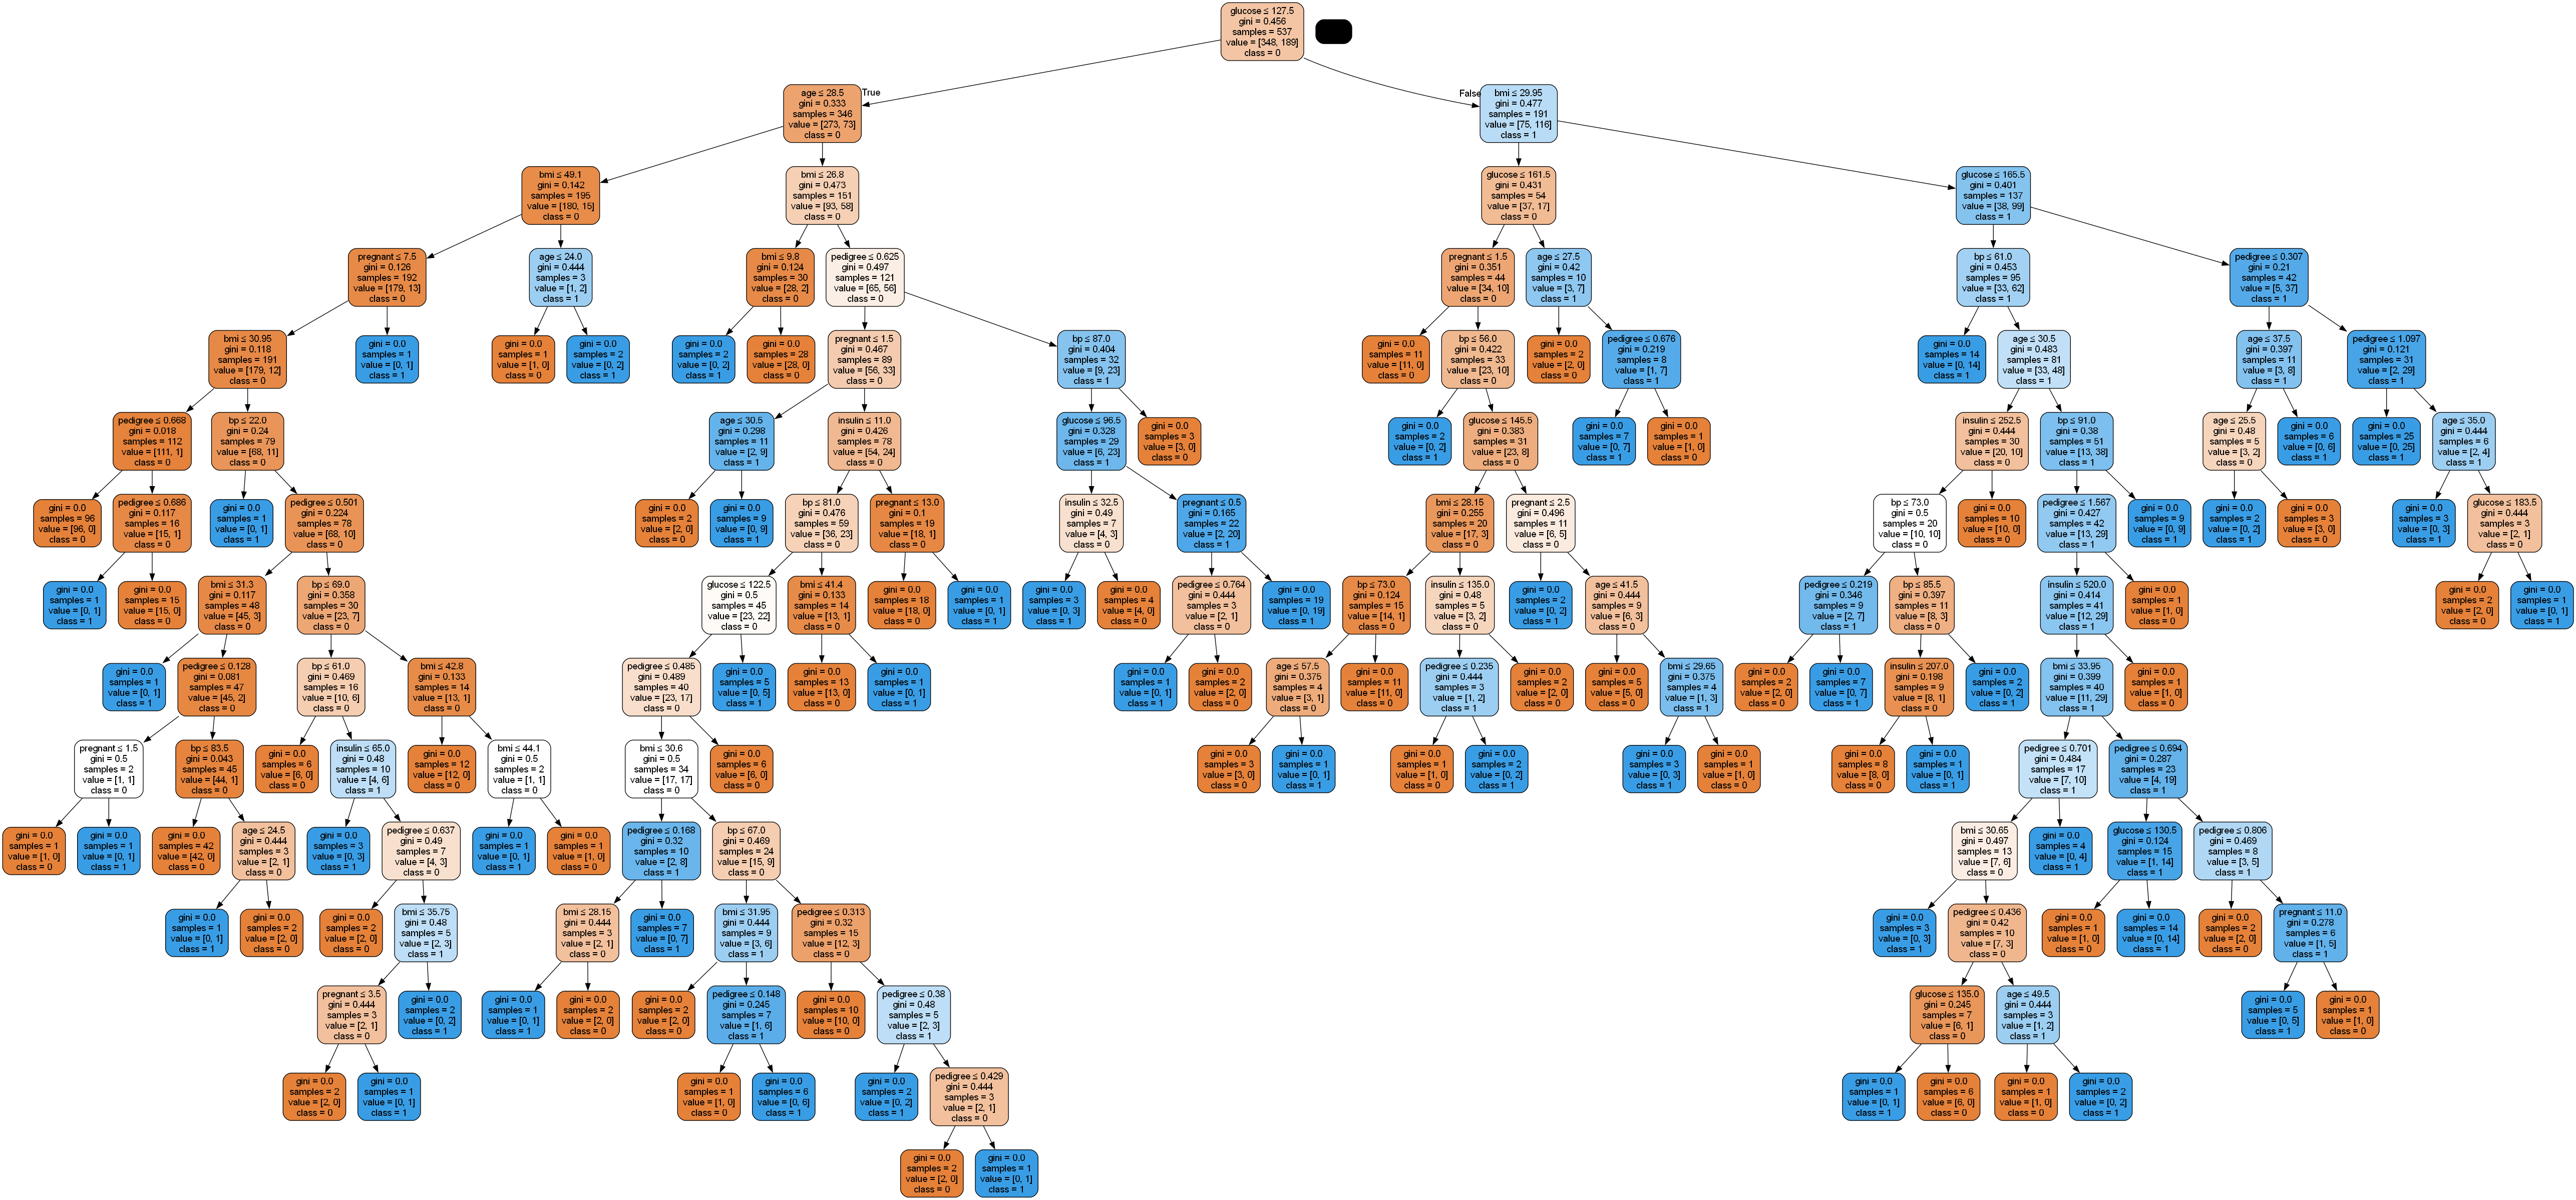

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier 
from sklearn.model_selection import train_test_split #import train test split function 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation 
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label'] 
#load dataset 
pima =pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names) 
#split dataset in features and target variable 
featurecols=['pregnant', 'glucose', 'bp', 'insulin', 'bmi', 'pedigree', 'age'] 
x= pima[featurecols] # Features 
y =pima.label # Target variable 
#Split dataset into training set and test set 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=4) 
print(x_train,x_test) 
print(y_train,y_test) 
#Create Decision Tree classifier object 
clf = DecisionTreeClassifier() 
#Train Decision Tree Classifier 
clf=clf.fit(x_train,y_train) 
#Predict the response for test dataset 
y_pred = clf.predict(x_test) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(np.column_stack((y_test,y_pred))) 
from sklearn.tree import export_graphviz 
from six import StringIO 
from IPython.display import Image 
import pydotplus 
dot_data= StringIO() 
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
special_characters=True, feature_names=featurecols,class_names=['0','1']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('diabetes.png') 
Image(graph.create_png())